## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots



from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import itertools
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import warnings

## 2. Read the data

In [2]:
train = pd.read_csv("Train_Set_TVS.csv", 
                    low_memory=False)
        
test = pd.read_csv("Test_Set_TVS.csv",
                  low_memory=False)
data_dictionary = pd.read_excel("Data_Dictionary_TVS.xlsx")

In [3]:
#Shape of dataframe
print(" Shape of training dataframe: ", train.shape)
print(" Shape of testing dataframe: ", test.shape)

 Shape of training dataframe:  (132440, 33)
 Shape of testing dataframe:  (56760, 32)


#### Training dataste has 132440 Rows and 33 columns
#### Test dataste has 56760 rows and 32 columns

In [4]:
# Checking top 5 rows from train data
train.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [5]:
# Checking top 5 rows from test data
test.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,5.4,Not_Specified,thur,Yes,CLoan,3.0,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,2.3,Y,wed,No,CLoan,2.0,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,Rural,1,Grad,Married,M,1_to_3,11.0,Y,thur,No,CLoan,3.0,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,9.7,Y,Tue,Yes,CLoan,2.0,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,Metro,3,P_Grad,Married,F,1_to_3,NaN,Y,wed,Yes,RLoan,2.0,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


In [6]:
# checking column names in train data
train.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt', 'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List', 'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating', 'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag', 'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Default'], dtype='object')

In [7]:
# checking column names in test data
test.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt', 'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List', 'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating', 'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag', 'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought'], dtype='object')

#### Test data doesnot have Target column "Default", we have to add this column while predicting the value

In [8]:
# Checking data types
train.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default               float64
dtype: obj

In [9]:
test.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
dtype: object

#### We have fields with int, float and obejct datatype.

#### Default column in Train dataset is of float type, while the values are 0 and 1. So changing the datatype to int for easy understanding

In [10]:
train['Default'] = train['Default'].astype(int)
train['Default'].dtypes

dtype('int32')

### Stats on Train data

In [11]:
train.describe()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
count,132440.000000,1.261980e+05,1.324400e+05,127829.000000,127024.000000,121476.000000,110595.000000,132440.000000,120709.000000,132440.00000,132440.000000,114927.000000,119119.000000,124287.000000,132440.000000,132440.000000
mean,488938.279319,7.450519e+05,4.148011e+05,10845.286442,0.020446,3.220891,6.580616,2.155467,2.030553,43.93326,12.060865,0.505929,0.506181,979.451383,3.387738,0.264301
std,58568.207772,4.702762e+05,2.746788e+05,2061.529355,0.015077,1.241751,6.357054,0.909046,0.503750,11.96270,3.566714,0.268665,0.268716,829.632194,2.173246,0.440962
min,387652.000000,1.527280e+05,3.427500e+04,5852.100000,0.000100,1.000000,0.000000,1.000000,1.000000,21.00000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,438095.500000,5.177060e+05,2.045300e+05,9348.370000,0.010400,2.000000,2.100000,2.000000,2.000000,34.00000,10.000000,0.268000,0.268000,288.000000,2.000000,0.000000
50%,488952.500000,6.659960e+05,3.495425e+05,10773.820000,0.020400,4.000000,4.600000,2.000000,2.000000,43.00000,12.000000,0.500000,0.500000,770.000000,3.000000,0.000000
75%,539702.000000,8.794890e+05,5.582050e+05,12165.390000,0.030400,4.000000,9.000000,3.000000,2.000000,54.00000,15.000000,0.769000,0.769000,1589.000000,5.000000,1.000000
max,590407.000000,7.037702e+07,2.872142e+06,41301.000000,2.017800,19.000000,48.100000,9.000000,3.000000,69.00000,25.000000,0.947000,0.947000,4309.000000,25.000000,1.000000


#### 1. Above table is showing data for int and float type columns only
#### 2. Count rows shows we have lots of missing values for a number of columns like density_ind, Experience etc.
#### 3. Age of customers applying from loan lies in between 21 to 69

## 3. Data Cleanup

### a. Checking for duplicate values

In [12]:
# Checking for duplicate values

train.duplicated().sum()

0

In [13]:
test.duplicated().sum()

0

####  We do not have duplicate rows in train and test dataset

### b. Checking for null values in train and test dataset

In [14]:
# null values in train data

null= train.isnull().sum().sort_values(ascending=False)
total =train.shape[0]
percent_missing= (train.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
            column name  Total missing  Percent missing
0           Experience          21845         0.164943
1             c1_rated          17513         0.132233
2             c2_rated          13321         0.100581
3       Company_Rating          11731         0.088576
4      Home_Appliances          10964         0.082785
5             Job_Type          10248         0.077378
6       Vehicle_Status           9104         0.068741
7          Contact_age           8153         0.061560
8           Income_Alt           7682         0.058004
9         Compensation           6242         0.047131
10         density_Ind           5416         0.040894
11         Annuity_amt           4611         0.034816
12          Credit_Inq           2690         0.020311
13           Prop_List           1965         0.014837
31            Loan_amt              0         0.000000
30        Default_hist              0         0.000000
23               Ph.No              

In [15]:
# null values in test data

null= test.isnull().sum().sort_values(ascending=False)
total =test.shape[0]
percent_missing= (test.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
            column name  Total missing  Percent missing
0           Experience           9351         0.164746
1             c1_rated           7363         0.129722
2             c2_rated           5655         0.099630
3       Company_Rating           5053         0.089024
4      Home_Appliances           4759         0.083844
5             Job_Type           4320         0.076110
6       Vehicle_Status           3883         0.068411
7          Contact_age           3522         0.062051
8           Income_Alt           3299         0.058122
9         Compensation           2750         0.048450
10         density_Ind           2275         0.040081
11         Annuity_amt           1963         0.034584
12          Credit_Inq           1166         0.020543
13           Prop_List            911         0.016050
30            Loan_amt              0         0.000000
29        Default_hist              0         0.000000
23         Day_Process              

#### 1. Experience, c1_rated , c2_rated , Company_Rating, Home_Appliances,  Job_Type, Vehicle_Status , Contact_age, Income_Alt, Compensation, density_Ind, Annuity_amt, Credit_Inq and Prop_List columns have null values in both train and test data set.

#### 2. Flag - Column "Job_type" has null values which can be area of concern

In [16]:
# Checking unique value in Job Type column

train_null_unique= train.Job_Type.unique()
test_null_unique= test.Job_Type.unique()
print(train_null_unique)
print (test_null_unique)

['IT' 'Govt.' 'Non-IT' nan]
['Govt.' 'IT' 'Non-IT' nan]


In [17]:
# Let's replace nan with Missing 

train.Job_Type= train.Job_Type.fillna("Missing")
test.Job_Type= test.Job_Type.fillna("Missing")
train_null_unique= train.Job_Type.unique()
test_null_unique= test.Job_Type.unique()
print(train_null_unique)
print (test_null_unique)

['IT' 'Govt.' 'Non-IT' 'Missing']
['Govt.' 'IT' 'Non-IT' 'Missing']


## 4. EDA

### 4.1 Class Distribution

In [18]:
# Let's see how the data in Target column is distributed

train['Default'].value_counts()

0    97436
1    35004
Name: Default, dtype: int64

In [19]:
35004/(97436 + 35004) * 100

26.43008154636062

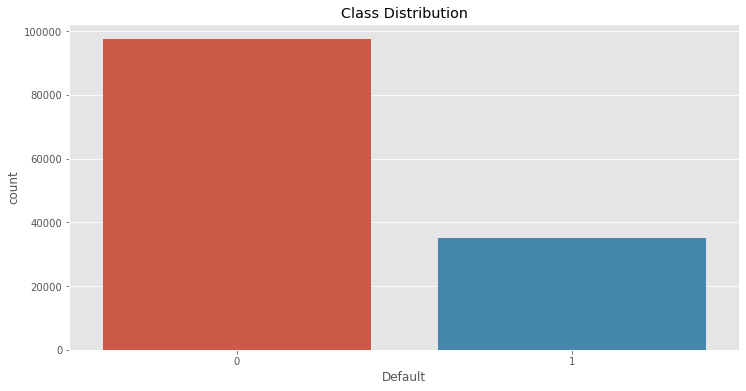

% of no defaults       : 73.56991845363939
Number of no defaults     : 97436
% of defaults         : 26.43008154636062
Number of defaults    : 35004


In [20]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'Default', data = train)
plt.title('Class Distribution')
plt.show()

# Count and %
Count_NoFraud_transacation = len(train[train['Default']==0])
Count_Fraud_transacation = len(train[train['Default']==1]) 
Percentage_of_NoFraud_transacation = Count_NoFraud_transacation/(Count_NoFraud_transacation+Count_Fraud_transacation)
print('% of no defaults       :',Percentage_of_NoFraud_transacation*100)
print('Number of no defaults     :', Count_NoFraud_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_NoFraud_transacation+Count_Fraud_transacation)
print('% of defaults         :',Percentage_of_Fraud_transacation*100)
print('Number of defaults    :', Count_Fraud_transacation)

#### Flag -Target class distribution is Uneven

In [21]:
print("Compensation\n")
print(train.groupby([train['Compensation']==0]).Default.value_counts(normalize=False))
print("##############\n")
print("Job_Type\n")
print(train.groupby(["Job_Type"]).Default.value_counts(normalize=True))
print("##############\n")
print("Default_hist\n")
print(train.groupby(["Default_hist"]).Default.value_counts(normalize=True))
print("##############\n")
print("Ph.No\n")
print(train.groupby(["Ph.No"]).Default.value_counts(normalize=True))
print("##############\n")
print("Addr_permanent\n")
print(train.groupby(["Addr_permanent"]).Default.value_counts(normalize=True))
print("##############\n")
print("Permanent_Addr_tag\n")
print(train.groupby(["Permanent_Addr_tag"]).Default.value_counts(normalize=True))
print("##############\n")

Compensation

Compensation  Default
False         0          97436
              1          35004
Name: Default, dtype: int64
##############

Job_Type

Job_Type  Default
Govt.     0          0.732758
          1          0.267242
IT        0          0.734750
          1          0.265250
Missing   0          0.739364
          1          0.260636
Non-IT    0          0.739148
          1          0.260852
Name: Default, dtype: float64
##############

Default_hist

Default_hist  Default
df            0          0.734966
              1          0.265034
ndf           0          0.735781
              1          0.264219
Name: Default, dtype: float64
##############

Ph.No

Ph.No  Default
No     0          0.727204
       1          0.272796
Yes    0          0.737824
       1          0.262176
Name: Default, dtype: float64
##############

Addr_permanent

Addr_permanent  Default
No              0          0.709631
                1          0.290369
Yes             0          0.737907
  

In [22]:
print(train.groupby(["Job_Type","Default_hist","Ph.No","Addr_permanent","Permanent_Addr_tag"]).Default.value_counts(normalize=False))
print("##############\n")

Job_Type  Default_hist  Ph.No  Addr_permanent  Permanent_Addr_tag  Default
Govt.     df            No     No              No                  0             16
                                                                   1              5
                                               Yes                 1             20
                                                                   0             16
                               Yes             No                  0            112
                                                                   1             36
                                               Yes                 0            299
                                                                   1            117
                        Yes    No              No                  0             22
                                                                   1              7
                                               Yes                 0             66
 

### Univariate Analysis

In [23]:
train_0 = train[train["Default"]==0]
train_1 = train[train["Default"]==1]

In [24]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()
    
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = train.loc[train['Default'] != 0]
    t0 = train.loc[train['Default'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="Dafault = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="DefaultT = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();


In [25]:
def plot_bar_comp(var,nrow=2):
    
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.countplot(train[feature],hue=train['Default'])
        #sns.countplot(train[feature],hue=train['Default'])
        plt.ylabel('Count plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [26]:
# Box Plot for one feature
def plot_box(feature, color):
    plt.figure(figsize=(10,6))
    plt.title("Box Plot of %s" % feature)
    sns.boxplot(train[feature].dropna(),color=color)
    plt.show()


In [27]:
# Bar Plot for one feature
def plot_bar(feature):
    plt.figure(figsize=(10,50))
    sns.catplot(y=feature, hue="Default", kind="count",
            palette="pastel", edgecolor=".6",
            data=train);

count    1.261980e+05
mean     7.450519e+05
std      4.702762e+05
min      1.527280e+05
25%      5.177060e+05
50%      6.659960e+05
75%      8.794890e+05
max      7.037702e+07
Name: Compensation, dtype: float64


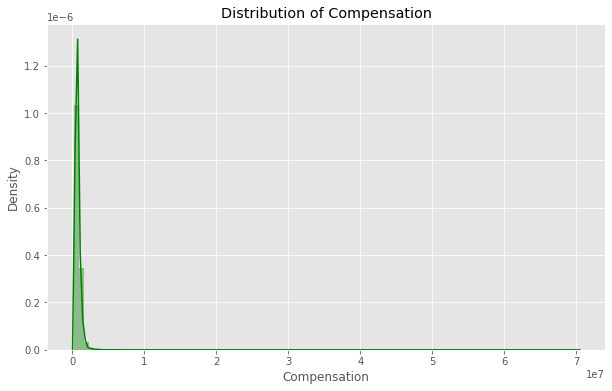

In [28]:
print(train.Compensation.describe())
plot_distribution('Compensation','green')

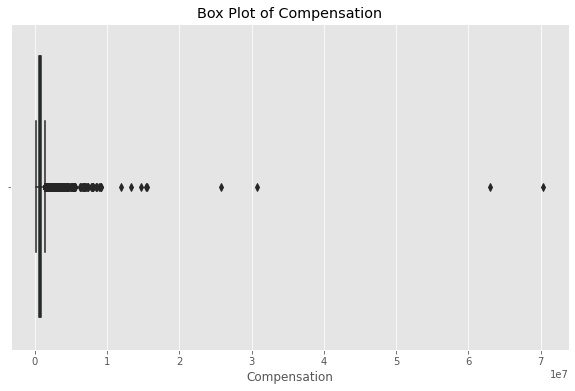

In [29]:
plot_box("Compensation", "green")

In [30]:
#Number of observations in column
obs = len(train.Compensation)
print("No. of observations in column: ",obs)

# calculate summary statistics
data_mean, data_std = mean(train.Compensation), std(train.Compensation)
print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train.Compensation if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

No. of observations in column:  132440
Statistics: Mean=745051.897, Std dev=470274.367
Identified outliers: 905


In [31]:
def impute_outlier(x):
    if x <= lower:
        return(data_mean)
    elif x>= (upper):
        return(data_mean)
    else:
        return(x)
train["Compensation_new"]= train["Compensation"].apply(impute_outlier)
print("No. of observations in column: ",len(train.Compensation_new))
outliers_new = [x for x in train.Compensation_new if x < lower or x > upper]
print('Identified outliers after imputing: %d' % len(outliers_new))

No. of observations in column:  132440
Identified outliers after imputing: 0


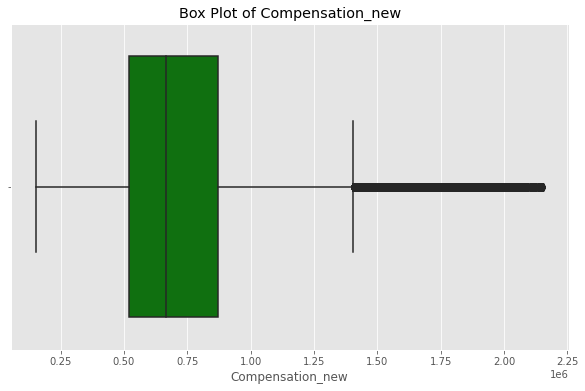

In [32]:
plot_box("Compensation_new", "green")

In [33]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['Compensation_bins'] = pd.qcut(train['Compensation'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['Compensation_bins'].value_counts()

Low        31550
High       31550
Medium     31549
Extreme    31549
Name: Compensation_bins, dtype: int64

<Figure size 720x3600 with 0 Axes>

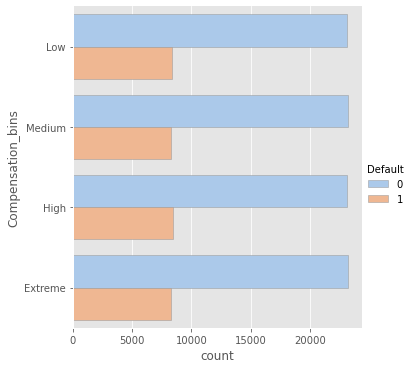

In [34]:
plot_bar("Compensation_bins")

count              132440.0
mean     414801.13372168137
std       274678.7792071855
min                 34275.0
25%               204529.95
50%                349542.5
75%                558205.0
max               2872142.0
Name: Loan_amt, dtype: object


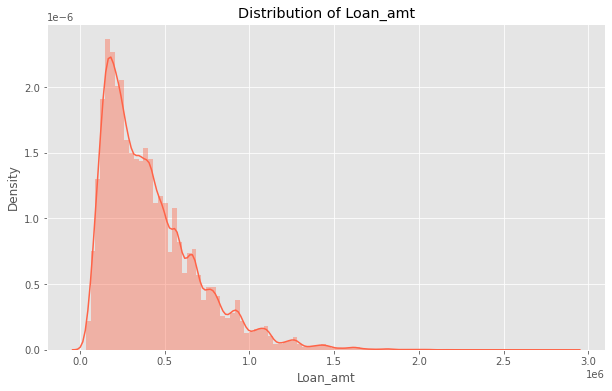

In [35]:
print(train.Loan_amt.describe().astype(str))
plot_distribution('Loan_amt','tomato')

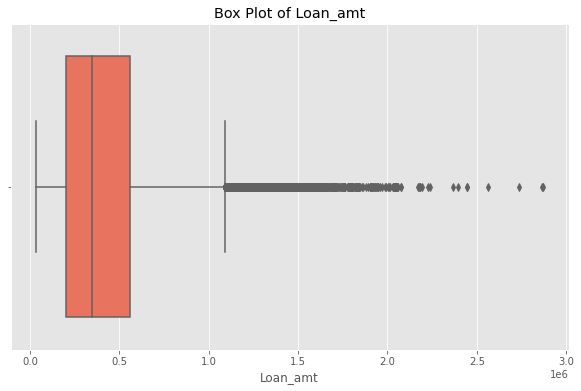

In [36]:
plot_box("Loan_amt", "tomato")

In [37]:
#Number of observations in column
obs = len(train.Loan_amt)
print("No. of observations in column: ",obs)

# calculate summary statistics
data_mean, data_std = mean(train.Loan_amt), std(train.Loan_amt)
print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train.Loan_amt if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

No. of observations in column:  132440
Statistics: Mean=414801.134, Std dev=274677.742
Identified outliers: 1876


In [38]:
train["Loan_amt_new"]= train["Loan_amt"].apply(impute_outlier)
print("No. of observations in column: ",len(train.Loan_amt_new))
outliers_loan_amt_new = [x for x in train.Loan_amt_new if x < lower or x > upper]
print('Identified outliers after imputing: %d' % len(outliers_loan_amt_new))

No. of observations in column:  132440
Identified outliers after imputing: 0


In [39]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['Loan_amt_bins'] = pd.qcut(train['Loan_amt'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['Loan_amt_bins'].value_counts()

Low        33110
Medium     33110
High       33110
Extreme    33110
Name: Loan_amt_bins, dtype: int64

<Figure size 720x3600 with 0 Axes>

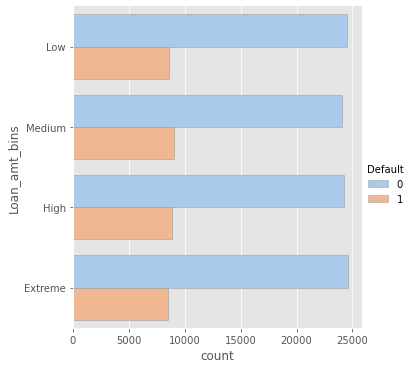

In [40]:
plot_bar("Loan_amt_bins")

count              127829.0
mean     10845.286442200137
std       2061.529355325679
min                  5852.1
25%                 9348.37
50%                10773.82
75%                12165.39
max                 41301.0
Name: Annuity_amt, dtype: object


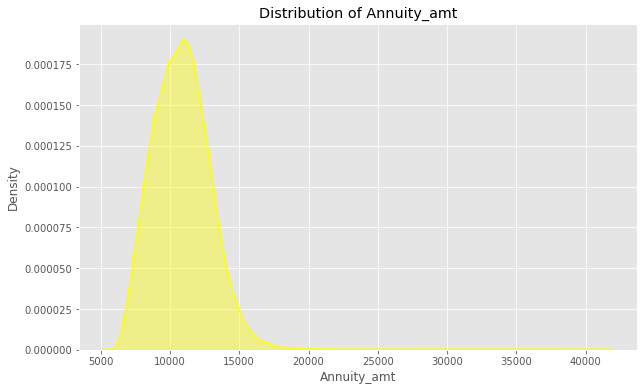

In [41]:
print(train.Annuity_amt.describe().astype(str))
plot_distribution('Annuity_amt','yellow')

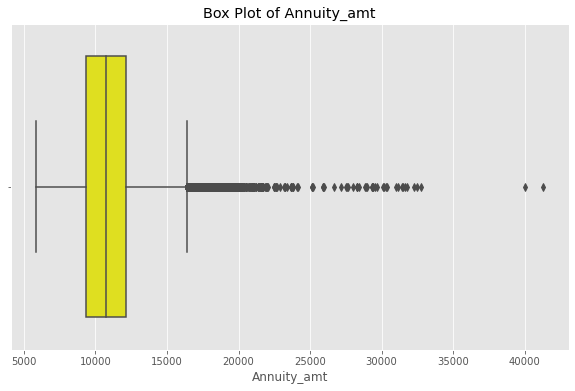

In [42]:
plot_box("Annuity_amt", "yellow")

In [43]:
#Number of observations in column
obs = len(train.Annuity_amt)
print("No. of observations in column: ",obs)

# calculate summary statistics
data_mean, data_std = mean(train.Annuity_amt), std(train.Annuity_amt)
print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train.Annuity_amt if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

No. of observations in column:  132440
Statistics: Mean=10845.286, Std dev=2061.521
Identified outliers: 621


In [44]:
train["Annuity_amt_new"]= train["Annuity_amt"].apply(impute_outlier)
print("No. of observations in column: ",len(train.Annuity_amt_new))
outliers_Annuity_amt_new = [x for x in train.Annuity_amt_new if x < lower or x > upper]
print('Identified outliers after imputing: %d' % len(outliers_Annuity_amt_new))

No. of observations in column:  132440
Identified outliers after imputing: 0


In [45]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['Annuity_amt_bins'] = pd.qcut(train['Annuity_amt'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['Annuity_amt_bins'].value_counts()

Low        31958
Medium     31957
High       31957
Extreme    31957
Name: Annuity_amt_bins, dtype: int64

<Figure size 720x3600 with 0 Axes>

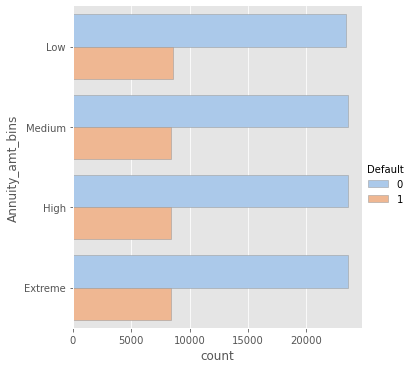

In [46]:
plot_bar("Annuity_amt_bins")

#### Loan Default is similar across all bins for Compensation, Loan amount and Annuity amount columns, means these fields doesn't help in predicting the Default.

count                127024.0
mean     0.020446197568964243
std      0.015076653474144342
min                    0.0001
25%                    0.0104
50%                    0.0204
75%                    0.0304
max                    2.0178
Name: density_Ind, dtype: object


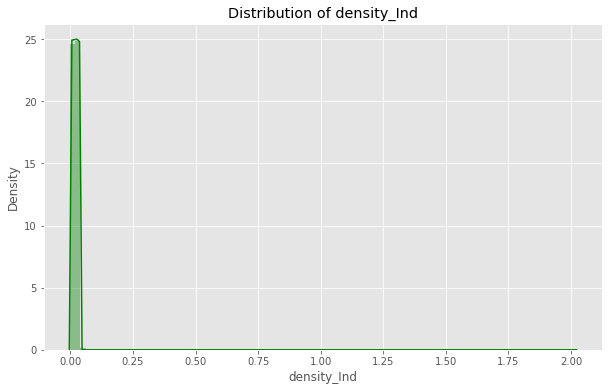

In [47]:
print(train.density_Ind.describe().astype(str))
plot_distribution('density_Ind','green')

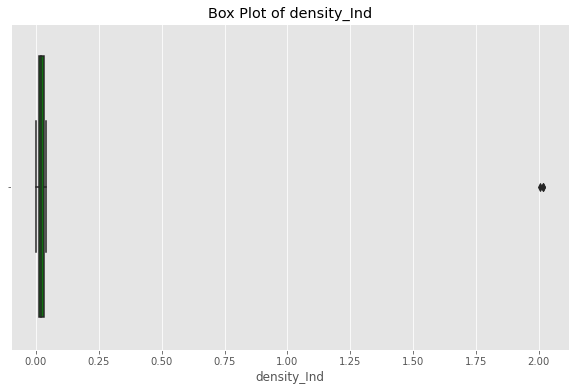

In [48]:
plot_box("density_Ind", "green")

In [49]:
#Number of observations in column
obs = len(train.density_Ind)
print("No. of observations in column: ",obs)

# calculate summary statistics
data_mean, data_std = mean(train.density_Ind), std(train.density_Ind)
print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train.density_Ind if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

No. of observations in column:  132440
Statistics: Mean=0.020, Std dev=0.015
Identified outliers: 3


#### There are only 3 outliers so need to remove it

In [50]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['density_Ind_bins'] = pd.qcut(train['density_Ind'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['density_Ind_bins'].value_counts()

Low        32013
Medium     31739
High       31672
Extreme    31600
Name: density_Ind_bins, dtype: int64

<Figure size 720x3600 with 0 Axes>

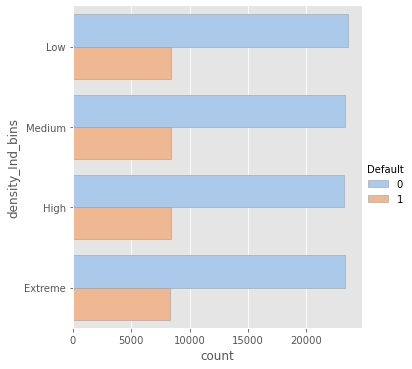

In [51]:
plot_bar("density_Ind_bins")

count             110595.0
mean     6.580615760205829
std        6.3570540740076
min                    0.0
25%                    2.1
50%                    4.6
75%                    9.0
max                   48.1
Name: Experience, dtype: object


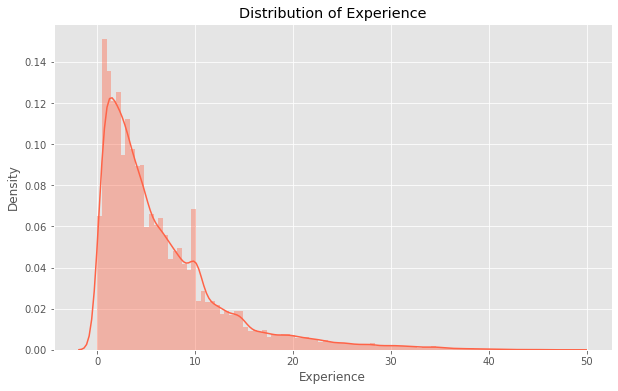

In [52]:
print(train.Experience.describe().astype(str))
plot_distribution('Experience','tomato')

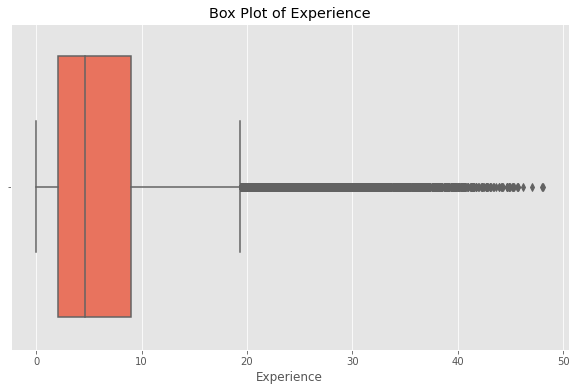

In [53]:
plot_box("Experience", "tomato")

In [54]:
#Number of observations in column
obs = len(train.Experience)
print("No. of observations in column: ",obs)

# calculate summary statistics
data_mean, data_std = mean(train.Experience), std(train.Experience)
print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train.Experience if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

No. of observations in column:  132440
Statistics: Mean=6.581, Std dev=6.357
Identified outliers: 2459


In [55]:
train["Experience_new"]= train["Experience"].apply(impute_outlier)
print("No. of observations in column: ",len(train.Experience_new))
outliers_Experience_new = [x for x in train.Experience_new if x < lower or x > upper]
print('Identified outliers after imputing: %d' % len(outliers_Experience_new))

No. of observations in column:  132440
Identified outliers after imputing: 0


In [56]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['Experience_bins'] = pd.qcut(train['Experience'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['Experience_bins'].value_counts()

Medium     27875
Low        27874
Extreme    27448
High       27398
Name: Experience_bins, dtype: int64

<Figure size 720x3600 with 0 Axes>

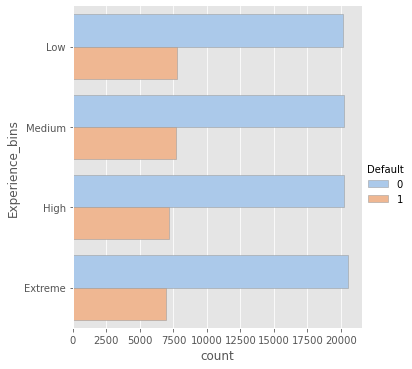

In [57]:
plot_bar("Experience_bins")

#### Customers with Low and Medium experience tend to default more

count               114927.0
mean      0.5059285111418536
std      0.26866464183293814
min                      0.0
25%                    0.268
50%                      0.5
75%                    0.769
max                    0.947
Name: c1_rated, dtype: object


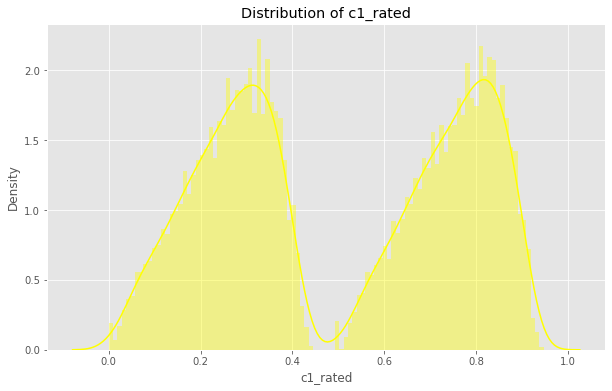

In [58]:
print(train.c1_rated.describe().astype(str))
plot_distribution('c1_rated','yellow')

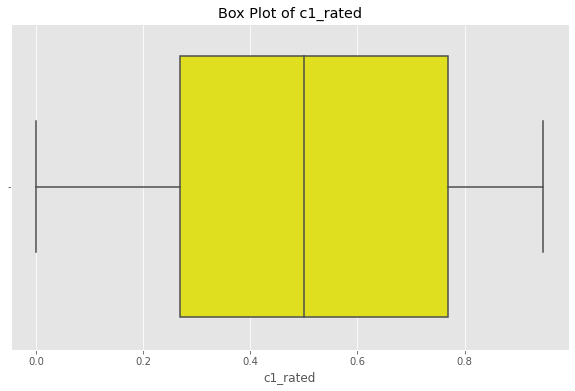

In [59]:
plot_box("c1_rated", "yellow")

In [60]:
#Number of observations in column
obs = len(train.c1_rated)
print("No. of observations in column: ",obs)

# calculate summary statistics
data_mean, data_std = mean(train.c1_rated), std(train.c1_rated)
print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train.c1_rated if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

No. of observations in column:  132440
Statistics: Mean=0.506, Std dev=0.269
Identified outliers: 0


In [61]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['c1_rated_bins'] = pd.qcut(train['c1_rated'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['c1_rated_bins'].value_counts()

Low        28843
Medium     28725
High       28725
Extreme    28634
Name: c1_rated_bins, dtype: int64

<Figure size 720x3600 with 0 Axes>

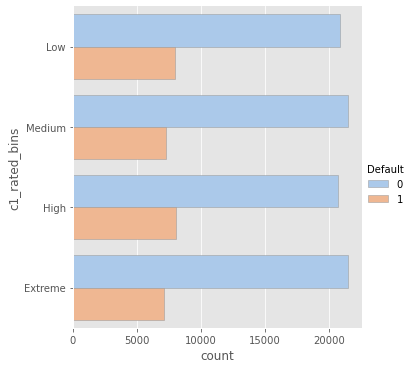

In [62]:
plot_bar("c1_rated_bins")

#### Low and High Credit scores from Source 1 tends to Default more

count               119119.0
mean      0.5061812305341724
std      0.26871552696680534
min                      0.0
25%                    0.268
50%                      0.5
75%                    0.769
max                    0.947
Name: c2_rated, dtype: object


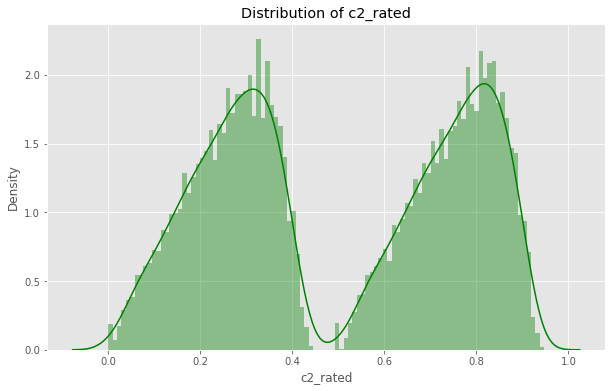

In [63]:
print(train.c2_rated.describe().astype(str))
plot_distribution('c2_rated','green')

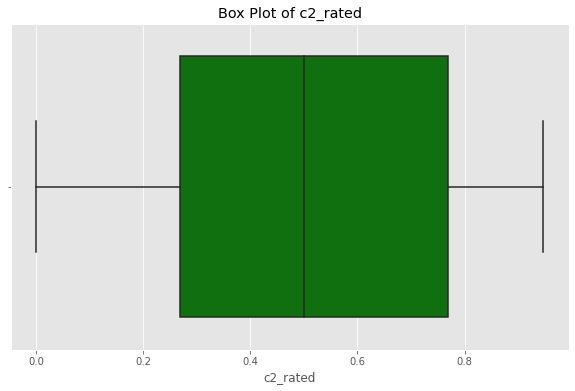

In [64]:
plot_box("c2_rated", "green")

In [65]:
#Number of observations in column
obs = len(train.c2_rated)
print("No. of observations in column: ",obs)

# calculate summary statistics
data_mean, data_std = mean(train.c2_rated), std(train.c2_rated)
print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train.c2_rated if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

No. of observations in column:  132440
Statistics: Mean=0.506, Std dev=0.269
Identified outliers: 0


In [66]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['c2_rated_bins'] = pd.qcut(train['c2_rated'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['c2_rated_bins'].value_counts()

Low        29845
Medium     29796
High       29743
Extreme    29735
Name: c2_rated_bins, dtype: int64

<Figure size 720x3600 with 0 Axes>

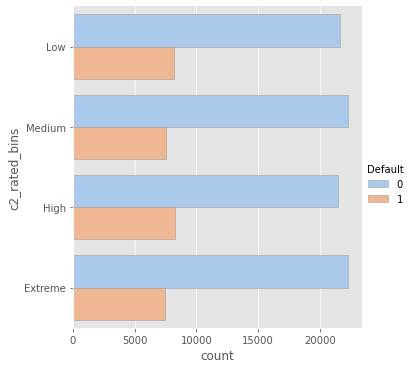

In [67]:
plot_bar("c2_rated_bins")

#### Credit score in High bin from Source2 tends to default more

### Bivariate Analysis

<Figure size 432x288 with 0 Axes>

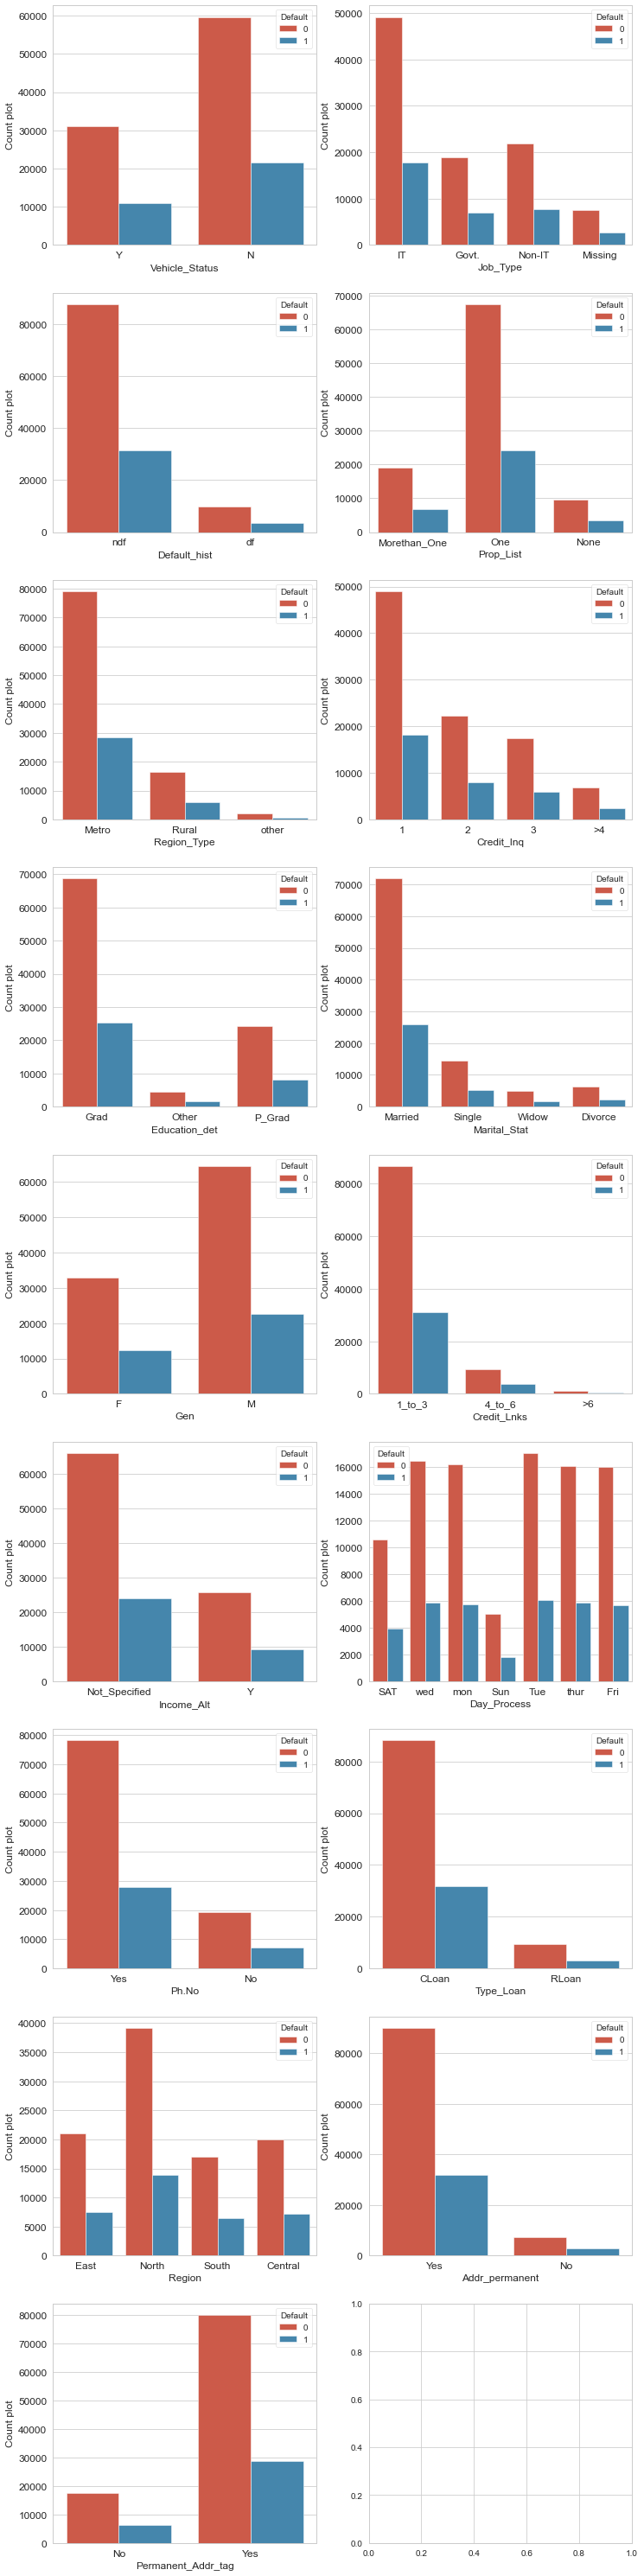

In [68]:
var = ['Vehicle_Status','Job_Type', 'Default_hist', 'Prop_List','Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen', 'Credit_Lnks','Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan', 'Region','Addr_permanent', 'Permanent_Addr_tag']
plot_bar_comp(var,nrow=9)

<AxesSubplot:xlabel='Default', ylabel='Home_Appliances'>

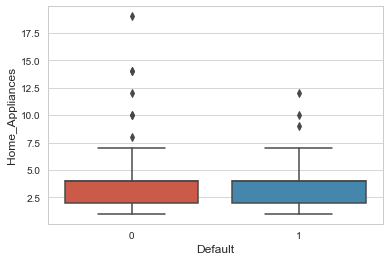

In [69]:
sns.boxplot(x="Default", y="Home_Appliances", data=train)

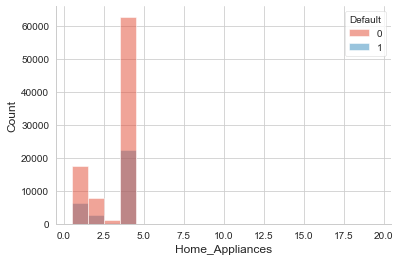

In [70]:
sns.histplot(data=train, x="Home_Appliances", hue="Default",discrete=True,);
sns.despine(right=True,top=True)

<AxesSubplot:xlabel='Default', ylabel='Age'>

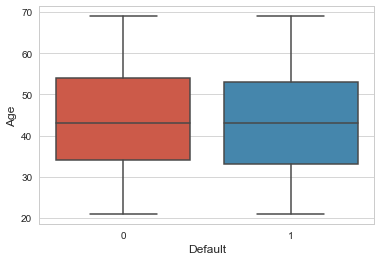

In [71]:
sns.boxplot(x="Default", y="Age", data=train)


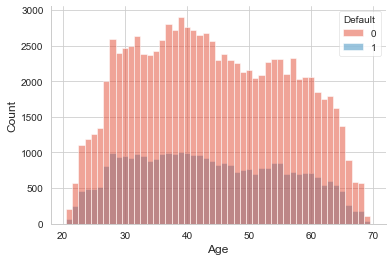

In [72]:
sns.histplot(data=train, x="Age", hue="Default",discrete=True,);
sns.despine(right=True,top=True)

<AxesSubplot:xlabel='Default', ylabel='Dependents'>

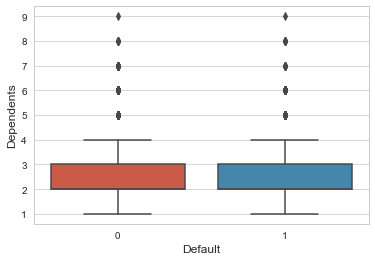

In [73]:
sns.boxplot(x="Default", y="Dependents", data=train)

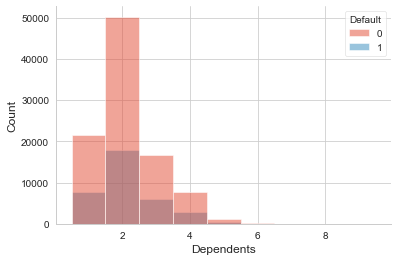

In [74]:
sns.histplot(data=train, x="Dependents", hue="Default",discrete=True,);
sns.despine(right=True,top=True)

<AxesSubplot:xlabel='Default', ylabel='hour_Process'>

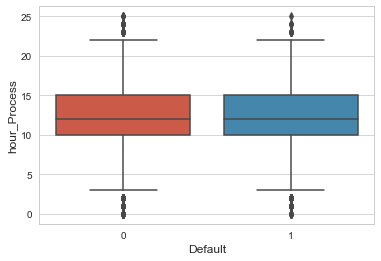

In [75]:
sns.boxplot(x="Default", y="hour_Process", data=train)

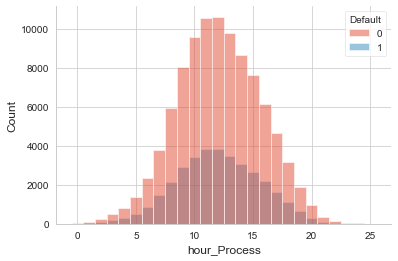

In [76]:
sns.histplot(data=train, x="hour_Process", hue="Default",discrete=True,);
sns.despine(right=True,top=True)

<AxesSubplot:xlabel='Default', ylabel='Contact_age'>

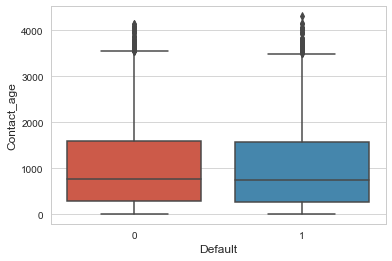

In [77]:
sns.boxplot(x="Default", y="Contact_age", data=train)

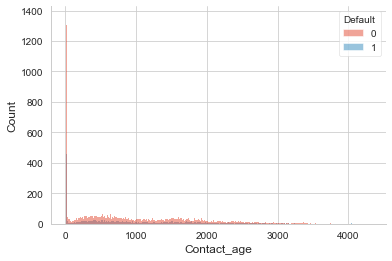

In [78]:
sns.histplot(data=train, x="Contact_age", hue="Default",discrete=True,);
sns.despine(right=True,top=True)

<AxesSubplot:xlabel='Default', ylabel='Product_bought'>

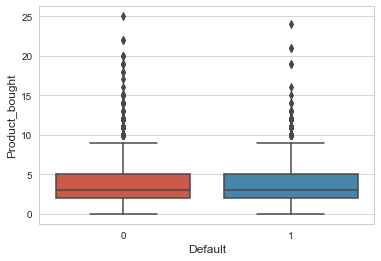

In [79]:
sns.boxplot(x="Default", y="Product_bought", data=train)

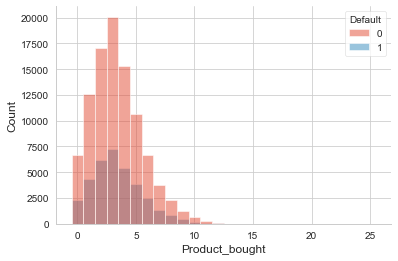

In [80]:
sns.histplot(data=train, x="Product_bought", hue="Default",discrete=True,);
sns.despine(right=True,top=True)

## 5. Preparing Data

In [81]:
# Lets drop Id column as it doesn't help in prediction

train = train.drop([ 'ID',],axis=1)

In [82]:
train.shape

(132440, 43)

In [83]:
# we don't need bins column anymore
train = train.drop([ 'Compensation_bins','Annuity_amt_bins','density_Ind_bins','Experience_bins','c1_rated_bins','c2_rated_bins'],axis=1)
train.shape

(132440, 37)

### 5.1 Treating null values in the Dataset before proceeding further

In [84]:
train['Vehicle_Status'] = train['Vehicle_Status'].fillna(train['Vehicle_Status'].mode()[0])
train['Company_Rating'] = train['Company_Rating'].fillna(train['Company_Rating'].mode()[0])
train['Prop_List'] = train['Prop_List'].fillna(train['Prop_List'].mode()[0])
train['Credit_Inq'] = train['Credit_Inq'].fillna(train['Credit_Inq'].mode()[0])
train['Income_Alt'] = train['Income_Alt'].fillna(train['Income_Alt'].mode()[0])

In [85]:
train['Experience'] = train['Experience'].fillna(train['Experience'].median())
train['c1_rated'] = train['c1_rated'].fillna(train['c1_rated'].median())
train['c2_rated'] = train['c2_rated'].fillna(train['c2_rated'].median())
train['Compensation'] = train['Compensation'].fillna(train['Compensation'].median())
train['density_Ind'] = train['density_Ind'].fillna(train['density_Ind'].median())
train['Annuity_amt'] = train['Annuity_amt'].fillna(train['Annuity_amt'].median())
train['Home_Appliances'] = train['Home_Appliances'].fillna(train['Home_Appliances'].median())
train['Contact_age'] = train['Contact_age'].fillna(train['Contact_age'].median())
train['Compensation_new'] = train['Compensation_new'].fillna(train['Compensation_new'].median())
train['Annuity_amt_new'] = train['Annuity_amt_new'].fillna(train['Annuity_amt_new'].median())
train['Experience_new'] = train['Experience_new'].fillna(train['Experience_new'].median())

In [86]:
test['Vehicle_Status'] = test['Vehicle_Status'].fillna(test['Vehicle_Status'].mode()[0])
test['Company_Rating'] = test['Company_Rating'].fillna(test['Company_Rating'].mode()[0])
test['Prop_List'] = test['Prop_List'].fillna(test['Prop_List'].mode()[0])
test['Credit_Inq'] = test['Credit_Inq'].fillna(test['Credit_Inq'].mode()[0])
test['Income_Alt'] = test['Income_Alt'].fillna(test['Income_Alt'].mode()[0])
test['Credit_Inq'] = test['Credit_Inq'].fillna(test['Credit_Inq'].mode()[0])

In [87]:
test['Experience'] = test['Experience'].fillna(test['Experience'].median())
test['c1_rated'] = test['c1_rated'].fillna(test['c1_rated'].median())
test['c2_rated'] = test['c2_rated'].fillna(test['c2_rated'].median())
test['Compensation'] = test['Compensation'].fillna(test['Compensation'].median())
test['density_Ind'] = test['density_Ind'].fillna(test['density_Ind'].median())
test['Annuity_amt'] = test['Annuity_amt'].fillna(test['Annuity_amt'].median())
test['Home_Appliances'] = test['Home_Appliances'].fillna(test['Home_Appliances'].median())
test['Contact_age'] = test['Contact_age'].fillna(test['Contact_age'].median())


In [88]:
train.isnull().sum()

Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Day_Process           0
Ph.No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
Default               0
Compensation_new      0
Loan_amt_new          0
Loan_amt_bins         0
Annuity_amt_new       0
Experience_new        0
dtype: int64

In [89]:
test.isnull().sum()

ID                    0
Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Day_Process           0
Ph.No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
dtype: int64

In [90]:
def plot_corr(train):
    corr = train.corr()
    f, ax = plt.subplots(figsize=(30, 15))
    sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

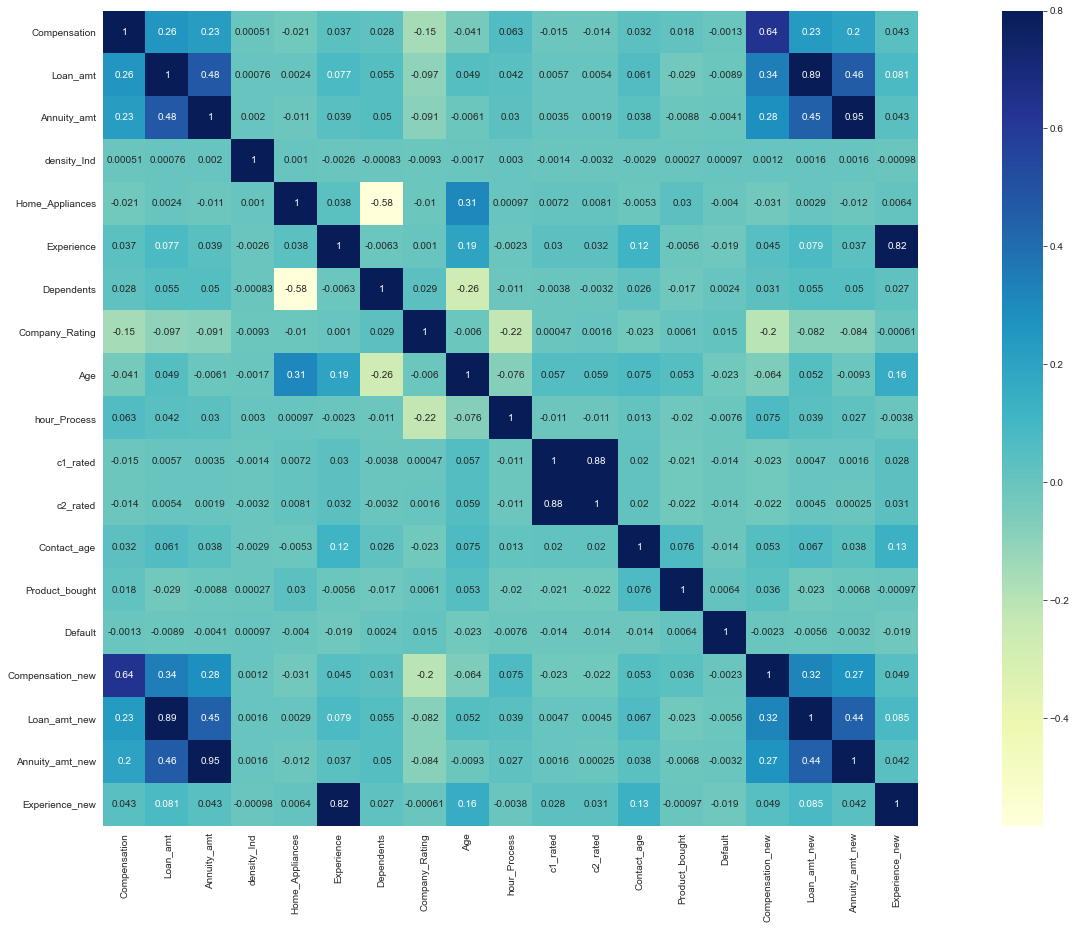

In [91]:
plot_corr(train)

### 5.2 Standardization of data

In [92]:
train_data = train[['Vehicle_Status', 'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List', 'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen', 'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating', 'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag', 'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Default', 'Compensation_new', 'Loan_amt_new', 'Annuity_amt_new', 'Experience_new']]

In [93]:
scaler_data = StandardScaler() 
def scaleColumns(df, cols_to_scale):

    for col in cols_to_scale:

        df[col] = pd.DataFrame(scaler_data.fit_transform(pd.DataFrame(train_data[col])),columns=[col])

    return df

In [94]:
train_data.columns

Index(['Vehicle_Status', 'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List', 'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen', 'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating', 'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag', 'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Default', 'Compensation_new', 'Loan_amt_new', 'Annuity_amt_new', 'Experience_new'], dtype='object')

In [95]:
train_data.shape

(132440, 32)

In [96]:
scaled_df = scaleColumns(train_data,['density_Ind', 'Age', 'hour_Process', 'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Compensation_new', 'Loan_amt_new', 'Annuity_amt_new', 'Experience_new'])

scaled_df.head()

,Vehicle_Status,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default,Compensation_new,Loan_amt_new,Annuity_amt_new,Experience_new
0,Y,0.674271,IT,ndf,Morethan_One,4.0,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,0.172766,-0.577807,Yes,No,-1.710671,-1.681619,-1.177948,-0.638558,1,0.264146,1.054025,1.561809,-1.038644
1,N,-0.070728,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,0.172766,-0.017065,Yes,Yes,-1.283147,-1.261763,-0.820301,0.281728,0,0.545373,-0.826864,0.191599,-0.593291
2,N,-0.585455,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,1.092294,-1.979663,Yes,Yes,0.131275,0.127293,-0.851347,0.281728,0,-1.503443,-1.223594,-1.250765,-0.253975
3,N,1.141589,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,-0.412388,-0.017065,Yes,Yes,-0.020555,0.217542,-1.175465,0.281728,0,-1.306264,-0.904832,-1.876023,-0.232768
4,Y,-0.450001,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,3.0,1.0,North,-0.997543,1.104420,Yes,Yes,-0.020555,-1.198981,1.704342,1.202014,0,1.827963,0.709203,1.248862,0.233792


### 5.3 Dummy Insertion

In [97]:
train_dummy = pd.get_dummies(scaled_df, prefix_sep='_', drop_first=True)
train_dummy.head()

,density_Ind,Home_Appliances,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default,Compensation_new,Loan_amt_new,Annuity_amt_new,Experience_new,Vehicle_Status_Y,Job_Type_IT,Job_Type_Missing,Job_Type_Non-IT,Default_hist_ndf,Prop_List_None,Prop_List_One,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Income_Alt_Y,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes
0,0.674271,4.0,3.0,2.0,0.172766,-0.577807,-1.710671,-1.681619,-1.177948,-0.638558,1,0.264146,1.054025,1.561809,-1.038644,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
1,-0.070728,1.0,3.0,1.0,0.172766,-0.017065,-1.283147,-1.261763,-0.820301,0.281728,0,0.545373,-0.826864,0.191599,-0.593291,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1
2,-0.585455,4.0,2.0,3.0,1.092294,-1.979663,0.131275,0.127293,-0.851347,0.281728,0,-1.503443,-1.223594,-1.250765,-0.253975,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1
3,1.141589,2.0,4.0,2.0,-0.412388,-0.017065,-0.020555,0.217542,-1.175465,0.281728,0,-1.306264,-0.904832,-1.876023,-0.232768,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1
4,-0.450001,1.0,3.0,1.0,-0.997543,1.104420,-0.020555,-1.198981,1.704342,1.202014,0,1.827963,0.709203,1.248862,0.233792,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1


In [98]:
train_dummy.shape

(132440, 49)

### 5.4 Dividing data in train and test

In [99]:
y = train_dummy[['Default']]
X= train_dummy.loc[:, train_dummy.columns != 'Default']
X.shape

(132440, 48)

In [100]:
np.any(np.isnan(X))

False

In [101]:
X = X.fillna(0)
X.shape

(132440, 48)

In [102]:
# Spliting Train Test data in 80-20 ratio

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## 6. Traditional Models

In [103]:
# Defining methods to evaluate models

# Confusion Matrix

# Confusion Matrix

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [104]:
# Precision, Recall, F1 Score

def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [105]:
# Precision-recall curve

def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

In [106]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

### 6.1 Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[19516     0]
 [ 6972     0]]
74.0


In [108]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, logpred))
print("F1 Score ",f1_score(y_test, logpred))
print("Recall Score ",recall_score(y_test, logpred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, logpred))

Accuracy of model  0.7367864693446089
F1 Score  0.0
Recall Score  0.0
Balanced Accuracy Score  0.5


#### Accuracy score is74% but model is not predicting any Default

### 6.2 Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[18728   788]
 [ 6688   284]]
72.0


In [110]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

Accuracy of model  0.7177589852008457
F1 Score  0.07061163600198905
Recall Score  0.04073436603557085
Balanced Accuracy Score  0.5001786197876154


#### Accuracy score is less than Logistic Model but it is predicting Defaults

### 6.3 Naive Bayes

In [111]:
from sklearn.naive_bayes import GaussianNB

# train model
nb = GaussianNB().fit(X_train, y_train)

# predict on test set
nb_pred = nb.predict(X_test)
print(confusion_matrix(y_test, nb_pred))
print(round(accuracy_score(y_test, nb_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[18948   568]
 [ 6734   238]]
72.0


In [112]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, nb_pred))
print("F1 Score ",f1_score(y_test, nb_pred))
print("Recall Score ",recall_score(y_test, nb_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, nb_pred))

Accuracy of model  0.7243279975838115
F1 Score  0.0611982514785292
Recall Score  0.03413654618473896
Balanced Accuracy Score  0.5025161107640235


#### Accuracy is similar to Random Forest though F1 score downed little bit

### 6.4 Stochastic Gradient Descent

In [113]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[19516     0]
 [ 6972     0]]
74.0


In [114]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, sgd_pred))
print("F1 Score ",f1_score(y_test, sgd_pred))
print("Recall Score ",recall_score(y_test, sgd_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, sgd_pred))

Accuracy of model  0.7367864693446089
F1 Score  0.0
Recall Score  0.0
Balanced Accuracy Score  0.5


#### Accuracy of model is high but no Default predicted

### 6.5 Decision Tree Classifier

In [115]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[19171   345]
 [ 6831   141]]
73.0


In [116]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, dtree_pred))
print("F1 Score ",f1_score(y_test, dtree_pred))
print("Recall Score ",recall_score(y_test, dtree_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, dtree_pred))

Accuracy of model  0.7290848686197523
F1 Score  0.03781174577634755
Recall Score  0.020223752151462996
Balanced Accuracy Score  0.5012729746615073


#### Accuracy is good but model is not predicting much Defaults

### 6.6 XG Boost

In [117]:
# XG Boost

from xgboost import XGBClassifier

# train model
xgb = XGBClassifier().fit(X_train, y_train)

# predict on test set
xgb_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, xgb_pred))
print(round(accuracy_score(y_test, xgb_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[21:49:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[19368   148]
 [ 6907    65]]
73.0


In [118]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, xgb_pred))
print("F1 Score ",f1_score(y_test, xgb_pred))
print("Recall Score ",recall_score(y_test, xgb_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, xgb_pred))

Accuracy of model  0.7336529749320447
F1 Score  0.018093249826026444
Recall Score  0.009323006310958119
Balanced Accuracy Score  0.5008697425487973


#### Accuracy is good but still mot much Default predicted

### Till now best Model is Random Forest and then Naive Bayes.

## 7. Balancing Target and build model again

### 7.1 Using SMOTE for Target Balance

### 7.1.1 Trying Random with SMOTE data

In [119]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc_SMOTE = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred_SMOTE = rfc_SMOTE.predict(X_test)
print(confusion_matrix(y_test, rfc_pred_SMOTE))
print(round(accuracy_score(y_test, rfc_pred_SMOTE),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[18742   774]
 [ 6673   299]]
72.0


In [120]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred_SMOTE))
print("F1 Score ",f1_score(y_test, rfc_pred_SMOTE))
print("Recall Score ",recall_score(y_test, rfc_pred_SMOTE))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred_SMOTE))

Accuracy of model  0.7188538205980066
F1 Score  0.07433188315724053
Recall Score  0.042885829030407344
Balanced Accuracy Score  0.5016130313424224


### 7.1.2 Naive Bayes with SMOTE data

In [121]:
from sklearn.naive_bayes import GaussianNB

# train model
nb_SMOTE = GaussianNB().fit(X_train, y_train)

# predict on test set
nb_pred_SMOTE = nb_SMOTE.predict(X_test)
print(confusion_matrix(y_test, nb_pred_SMOTE))
print(round(accuracy_score(y_test, nb_pred_SMOTE),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[18948   568]
 [ 6734   238]]
72.0


In [122]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, nb_pred_SMOTE))
print("F1 Score ",f1_score(y_test, nb_pred_SMOTE))
print("Recall Score ",recall_score(y_test, nb_pred_SMOTE))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, nb_pred_SMOTE))

Accuracy of model  0.7243279975838115
F1 Score  0.0611982514785292
Recall Score  0.03413654618473896
Balanced Accuracy Score  0.5025161107640235


### 7.1.3 SGD Classifier

In [123]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[19516     0]
 [ 6972     0]]
74.0


In [124]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, sgd_pred))
print("F1 Score ",f1_score(y_test, sgd_pred))
print("Recall Score ",recall_score(y_test, sgd_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, sgd_pred))

Accuracy of model  0.7367864693446089
F1 Score  0.0
Recall Score  0.0
Balanced Accuracy Score  0.5


### 7.1.4 Decision Tress Classifier

In [125]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree_SMOTE= DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred_SMOTE = dtree_SMOTE.predict(X_test)
print(confusion_matrix(y_test, dtree_pred_SMOTE))
print(round(accuracy_score(y_test, dtree_pred_SMOTE),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[19171   345]
 [ 6831   141]]
73.0


In [126]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, dtree_pred_SMOTE))
print("F1 Score ",f1_score(y_test, dtree_pred_SMOTE))
print("Recall Score ",recall_score(y_test, dtree_pred_SMOTE))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, dtree_pred_SMOTE))

Accuracy of model  0.7290848686197523
F1 Score  0.03781174577634755
Recall Score  0.020223752151462996
Balanced Accuracy Score  0.5012729746615073


### Still Random Forest is giving the best result among all models

## 7.2 Targte Balance using Upsampling

In [127]:
y = train_dummy[['Default']]
X= train_dummy.loc[:, train_dummy.columns != 'Default']
X.shape

(132440, 48)

In [128]:
from sklearn.utils import resample
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Default==0]
fraud = X[X.Default==1]

In [129]:
# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Default.value_counts()

y_train_upsample = upsampled.Default
X_train_upsample = upsampled.drop('Default', axis=1)

In [130]:
X_train_upsample.shape

(155840, 48)

In [131]:
y_train_upsample.shape

(155840,)

### 7.2.1 Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train_upsample, y_train_upsample)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train_upsample, y_train_upsample, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

[[18094  1422]
 [ 6417   555]]
70.0
Accuracy of model  0.7040546662639686
F1 Score  0.124036205162588
Recall Score  0.07960413080895008
Balanced Accuracy Score  0.5033704195754117


### 7.2.2 Naive Bayes

In [133]:
from sklearn.naive_bayes import GaussianNB

# train model
nb_upsample = GaussianNB().fit(X_train_upsample, y_train_upsample)

# predict on test set
nb_pred = nb_upsample.predict(X_test)
print(confusion_matrix(y_test, nb_pred))
print(round(accuracy_score(y_test, nb_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train_upsample, y_train_upsample, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[ 9066 10450]
 [ 3094  3878]]
49.0


In [134]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, nb_pred))
print("F1 Score ",f1_score(y_test, nb_pred))
print("Recall Score ",recall_score(y_test, nb_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, nb_pred))

Accuracy of model  0.48867411658109333
F1 Score  0.364131455399061
Recall Score  0.5562248995983936
Balanced Accuracy Score  0.5103834069625499


### 7.2.3 Decison Classifier

In [135]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree_upsample = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train_upsample, y_train_upsample)

# predict on test set
dtree_pred_upsample = dtree_upsample.predict(X_test)
print(confusion_matrix(y_test, dtree_pred_upsample))
print(round(accuracy_score(y_test, dtree_pred_upsample),2)*100)
LOGCV = (cross_val_score(logmodel, X_train_upsample, y_train_upsample, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[11148  8368]
 [ 3860  3112]]
54.0


In [136]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, dtree_pred))
print("F1 Score ",f1_score(y_test, dtree_pred))
print("Recall Score ",recall_score(y_test, dtree_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, dtree_pred))

Accuracy of model  0.7290848686197523
F1 Score  0.03781174577634755
Recall Score  0.020223752151462996
Balanced Accuracy Score  0.5012729746615073


### 7.2.4 SGD Classifier

In [137]:
from sklearn.linear_model import SGDClassifier

# train model
sgd_upsampling = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train_upsample, y_train_upsample)

# predict on test set
sgd_pred_upsampling = sgd_upsampling.predict(X_test)
print(confusion_matrix(y_test, sgd_pred_upsampling))
print(round(accuracy_score(y_test, sgd_pred_upsampling),2)*100)
LOGCV = (cross_val_score(logmodel, X_train_upsample, y_train_upsample, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[ 5526 13990]
 [ 1834  5138]]
40.0


In [138]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, sgd_pred_upsampling))
print("F1 Score ",f1_score(y_test, sgd_pred_upsampling))
print("Recall Score ",recall_score(y_test, sgd_pred_upsampling))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, sgd_pred_upsampling))

Accuracy of model  0.4025974025974026
F1 Score  0.39371647509578545
Recall Score  0.7369477911646586
Balanced Accuracy Score  0.5100500382345121


Feature: 0, Score: 0.01812
Feature: 1, Score: 0.01492
Feature: 2, Score: -0.01184
Feature: 3, Score: 0.01254
Feature: 4, Score: -0.04542
Feature: 5, Score: 0.02141
Feature: 6, Score: 0.00768
Feature: 7, Score: -0.06397
Feature: 8, Score: -0.02986
Feature: 9, Score: 0.00008
Feature: 10, Score: -0.02124
Feature: 11, Score: 0.00001
Feature: 12, Score: -0.05669
Feature: 13, Score: 0.00291
Feature: 14, Score: -0.01015
Feature: 15, Score: -0.02690
Feature: 16, Score: -0.03731
Feature: 17, Score: -0.04111
Feature: 18, Score: -0.06121
Feature: 19, Score: -0.11809
Feature: 20, Score: 0.02628
Feature: 21, Score: 0.00086
Feature: 22, Score: -0.00939
Feature: 23, Score: 0.00660
Feature: 24, Score: -0.01599
Feature: 25, Score: 0.01829
Feature: 26, Score: -0.03564
Feature: 27, Score: -0.03791
Feature: 28, Score: -0.00106
Feature: 29, Score: 0.01345
Feature: 30, Score: 0.03749
Feature: 31, Score: 0.00094
Feature: 32, Score: -0.01701
Feature: 33, Score: -0.02307
Feature: 34, Score: -0.02323
Feature: 3

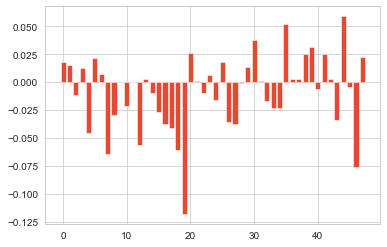

In [139]:
from matplotlib import pyplot
# get importance
importance = sgd_upsampling.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

####  SGD classifier is giving F1 score of 39.4% though accuracy is dropped to 33%. Naive Bayes is giving F1 score of 37 with 49% accuracy and Decision classifier is giving F1 score of 36.5% with accuracy 50%

### 7.3 Downsampling

In [140]:
y = train_dummy[['Default']]
X= train_dummy.loc[:, train_dummy.columns != 'Default']
X.shape

(132440, 48)

In [141]:

#Downsample
from sklearn.utils import resample
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Default==0]
fraud = X[X.Default==1]

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Default.value_counts()

y_train = downsampled.Default
X_train = downsampled.drop('Default', axis=1)

### 7.3.1 DecisionTree Classifier

In [142]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[12067  7449]
 [ 4154  2818]]
56.00000000000001


In [143]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, dtree_pred))
print("F1 Score ",f1_score(y_test, dtree_pred))
print("Recall Score ",recall_score(y_test, dtree_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, dtree_pred))

Accuracy of model  0.5619525823014195
F1 Score  0.32693311677011433
Recall Score  0.40418818129661505
Balanced Accuracy Score  0.5112506801133618


### 7.3.2 SGD Classifier

In [144]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[19431    85]
 [ 6925    47]]
74.0


In [145]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, sgd_pred))
print("F1 Score ",f1_score(y_test, sgd_pred))
print("Recall Score ",recall_score(y_test, sgd_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, sgd_pred))

Accuracy of model  0.7353518574448807
F1 Score  0.013231981981981982
Recall Score  0.006741250717154331
Balanced Accuracy Score  0.5011929250101451


### 7.3.3 RandomForest Classifer

In [146]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

[[12094  7422]
 [ 4271  2701]]
56.00000000000001
Accuracy of model  0.5585548172757475
F1 Score  0.31599883006727114
Recall Score  0.38740676993689044
Balanced Accuracy Score  0.5035517145441779


### 7.3.4 Naive Bayes Classifier

In [147]:
from sklearn.naive_bayes import GaussianNB

# train model
nb = GaussianNB().fit(X_train, y_train)

# predict on test set
nb_pred = nb.predict(X_test)
print(confusion_matrix(y_test, nb_pred))
print(round(accuracy_score(y_test, nb_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[12099  7417]
 [ 4136  2836]]
56.00000000000001


In [148]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, nb_pred))
print("F1 Score ",f1_score(y_test, nb_pred))
print("Recall Score ",recall_score(y_test, nb_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, nb_pred))

Accuracy of model  0.5638402295379039
F1 Score  0.329288824383164
Recall Score  0.4067699368904188
Balanced Accuracy Score  0.5133613980414381


#### F1 score is increased by .1-.2 % though accuracy has dropped by 1%. SGD classifier is giving F1 score of 41.2% though accuracy is dropped to 32%. Naive Bayes is giving F1 score of 37.1% with 49% accuracy and Decision classifier is giving F1 score of 36.5% with accuracy 50%

## 8. PCA

In [149]:
y = train_dummy[['Default']]
X= train_dummy.loc[:, train_dummy.columns != 'Default']
X.shape

(132440, 48)

In [150]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA()

In [151]:
pca.explained_variance_ratio_.astype(str)

array(['0.13090499748188478', '0.10509236166603152',
       '0.09826039400510315', '0.06766883904512613',
       '0.05770031403877331', '0.05615881255222899',
       '0.05553072981300411', '0.04789289151104948',
       '0.04630378423413115', '0.040869887046442295',
       '0.03217736070859269', '0.02989912601600329',
       '0.018554992203406447', '0.015074713997940935',
       '0.014473845230964141', '0.012732255984943529',
       '0.011525996393254178', '0.01098416572242302',
       '0.010598774887732384', '0.010138306661727471',
       '0.009597879333157375', '0.009314472828749434',
       '0.009200733632889849', '0.009038335932058668',
       '0.007961999974183705', '0.00781311002479452',
       '0.007618525100412312', '0.006536223937092097',
       '0.006448210050610036', '0.006398314068527002',
       '0.0062920997770624775', '0.004834166788422226',
       '0.004402883553882279', '0.003962018421094281',
       '0.003852140104725717', '0.003670789297371677',
       '0.003346284310

Text(0, 0.5, 'Cumulative variance explained')

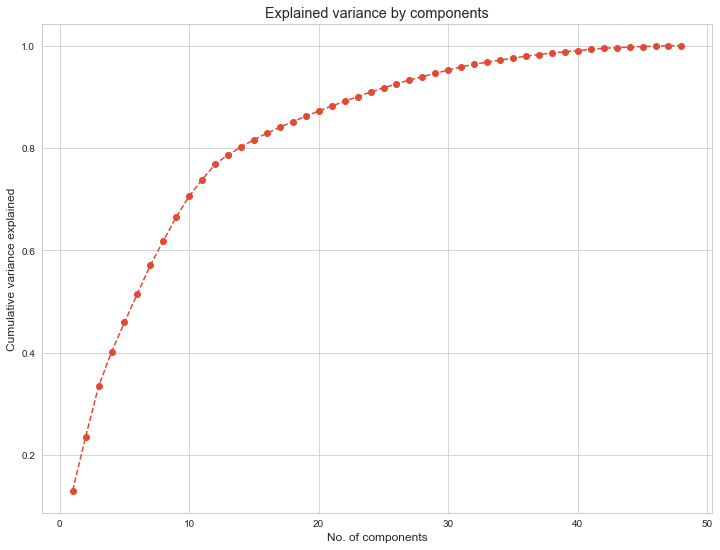

In [152]:
plt.figure(figsize= (12,9))
plt.plot(range(1,49), pca.explained_variance_ratio_.cumsum(), marker= 'o', linestyle='--')
plt.title("Explained variance by components")
plt.xlabel("No. of components")
plt.ylabel("Cumulative variance explained")

#### Elbow seems to be at 12, so selecting n_components=12

In [153]:
pca = PCA(n_components = 12)
pca.fit(X)

PCA(n_components=12)

In [154]:
Xpca = pca.transform(X)

In [155]:
# Splitting data again

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size = 0.20, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [156]:
X_train.shape

(105952, 12)

### 8.1 Decision Classifier

In [157]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[19273   243]
 [ 6874    98]]
73.0


In [158]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, dtree_pred))
print("F1 Score ",f1_score(y_test, dtree_pred))
print("Recall Score ",recall_score(y_test, dtree_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, dtree_pred))

Accuracy of model  0.731312292358804
F1 Score  0.026801586216327087
Recall Score  0.014056224899598393
Balanced Accuracy Score  0.5008024514536934


### 8.2 SGD classifier

In [159]:
from sklearn.linear_model import SGDClassifier

# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[19512     4]
 [ 6969     3]]
74.0


In [160]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, sgd_pred))
print("F1 Score ",f1_score(y_test, sgd_pred))
print("Recall Score ",recall_score(y_test, sgd_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, sgd_pred))

Accuracy of model  0.7367487163998792
F1 Score  0.0008597220232124946
Recall Score  0.0004302925989672978
Balanced Accuracy Score  0.5001126662830868


### 8.3 Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

[[18683   833]
 [ 6685   287]]
72.0
Accuracy of model  0.7161733615221987
F1 Score  0.07093425605536331
Recall Score  0.04116465863453815
Balanced Accuracy Score  0.4992408659026349


### 8.4 Naive Bayes

In [162]:
from sklearn.naive_bayes import GaussianNB

# train model
nb = GaussianNB().fit(X_train, y_train)

# predict on test set
nb_pred = nb.predict(X_test)
print(confusion_matrix(y_test, nb_pred))
print(round(accuracy_score(y_test, nb_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[19516     0]
 [ 6972     0]]
74.0


In [163]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, nb_pred))
print("F1 Score ",f1_score(y_test, nb_pred))
print("Recall Score ",recall_score(y_test, nb_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, nb_pred))

Accuracy of model  0.7367864693446089
F1 Score  0.0
Recall Score  0.0
Balanced Accuracy Score  0.5


#### Accuracy and F1 dropped after feature reduction.

#### Best model so far is SGD with Upsampling data which giving 39.37% F1 score.

### 9. Predicting Default for Test data

In [164]:
test.shape

(56760, 32)

In [165]:
test.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt', 'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List', 'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating', 'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag', 'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought'], dtype='object')

In [166]:
# sclaing test data

test_data = test[['Vehicle_Status', 'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List', 'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen', 'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating', 'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag', 'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Compensation', 'Loan_amt', 'Annuity_amt', 'Experience']]

scaler_data = StandardScaler() 
def scaleColumns(df, cols_to_scale):

    for col in cols_to_scale:

        df[col] = pd.DataFrame(scaler_data.fit_transform(pd.DataFrame(test_data[col])),columns=[col])

    return df

test_data.columns

test_scaled_df = scaleColumns(test_data,['density_Ind', 'Age', 'hour_Process', 'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Compensation', 'Loan_amt', 'Annuity_amt', 'Experience'])

test_scaled_df.head()

,Vehicle_Status,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Compensation,Loan_amt,Annuity_amt,Experience
0,Y,-1.152441,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,Not_Specified,thur,Yes,CLoan,3.0,2.0,North,-0.412734,-0.303673,Yes,Yes,-0.583193,-0.614842,2.713946,-0.643678,-0.232708,1.430659,-0.831967,-0.148926
1,N,0.774576,Govt.,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,Y,wed,No,CLoan,2.0,3.0,Central,0.171600,0.259050,Yes,Yes,-1.028270,-1.054741,0.962400,0.735944,-0.828340,-1.239008,-1.554310,-0.684267
2,N,0.677313,IT,ndf,Morethan_One,4.0,Rural,1,Grad,Married,M,1_to_3,Y,thur,No,CLoan,3.0,2.0,South,-0.913592,0.821773,Yes,Yes,-1.528982,-1.549628,-0.249826,0.276070,-0.678967,-0.533756,-0.887620,0.818141
3,N,0.701629,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,Y,Tue,Yes,CLoan,2.0,2.0,East,0.338552,-0.022312,Yes,Yes,-0.686514,-0.716962,-0.437090,0.276070,0.594784,0.757428,0.992186,0.593643
4,N,-0.799864,Non-IT,ndf,One,4.0,Metro,3,P_Grad,Married,F,1_to_3,Y,wed,Yes,RLoan,2.0,3.0,North,0.755934,-1.429119,Yes,Yes,1.765385,1.706411,0.328197,-1.103552,1.618839,0.416537,0.478858,-0.287079


In [167]:
# Inserting Dummy Variables

test_dummy = pd.get_dummies(test_scaled_df, prefix_sep='_', drop_first=True)
test_dummy.head()

,density_Ind,Home_Appliances,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Compensation,Loan_amt,Annuity_amt,Experience,Vehicle_Status_Y,Job_Type_IT,Job_Type_Missing,Job_Type_Non-IT,Default_hist_ndf,Prop_List_None,Prop_List_One,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Income_Alt_Y,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes
0,-1.152441,1.0,3.0,2.0,-0.412734,-0.303673,-0.583193,-0.614842,2.713946,-0.643678,-0.232708,1.430659,-0.831967,-0.148926,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1
1,0.774576,4.0,2.0,3.0,0.171600,0.259050,-1.028270,-1.054741,0.962400,0.735944,-0.828340,-1.239008,-1.554310,-0.684267,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1
2,0.677313,4.0,3.0,2.0,-0.913592,0.821773,-1.528982,-1.549628,-0.249826,0.276070,-0.678967,-0.533756,-0.887620,0.818141,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1
3,0.701629,4.0,2.0,2.0,0.338552,-0.022312,-0.686514,-0.716962,-0.437090,0.276070,0.594784,0.757428,0.992186,0.593643,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1
4,-0.799864,4.0,2.0,3.0,0.755934,-1.429119,1.765385,1.706411,0.328197,-1.103552,1.618839,0.416537,0.478858,-0.287079,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,1


In [168]:
test_dummy.shape

(56760, 48)

In [169]:
test_dummy.columns

Index(['density_Ind', 'Home_Appliances', 'Dependents', 'Company_Rating', 'Age', 'hour_Process', 'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Compensation', 'Loan_amt', 'Annuity_amt', 'Experience', 'Vehicle_Status_Y', 'Job_Type_IT', 'Job_Type_Missing', 'Job_Type_Non-IT', 'Default_hist_ndf', 'Prop_List_None', 'Prop_List_One', 'Region_Type_Rural', 'Region_Type_other', 'Credit_Inq_2', 'Credit_Inq_3', 'Credit_Inq_>4', 'Education_det_Other', 'Education_det_P_Grad', 'Marital_Stat_Married', 'Marital_Stat_Single', 'Marital_Stat_Widow', 'Gen_M', 'Credit_Lnks_4_to_6', 'Credit_Lnks_>6', 'Income_Alt_Y', 'Day_Process_SAT', 'Day_Process_Sun', 'Day_Process_Tue', 'Day_Process_mon', 'Day_Process_thur', 'Day_Process_wed', 'Ph.No_Yes', 'Type_Loan_RLoan', 'Region_East', 'Region_North', 'Region_South', 'Addr_permanent_Yes', 'Permanent_Addr_tag_Yes'], dtype='object')

In [170]:
test_sgd_prediction = sgd_upsampling.predict(test_dummy)

In [171]:
test_dummy['Default'] = test_sgd_prediction
test_dummy.head()

,density_Ind,Home_Appliances,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Compensation,Loan_amt,Annuity_amt,Experience,Vehicle_Status_Y,Job_Type_IT,Job_Type_Missing,Job_Type_Non-IT,Default_hist_ndf,Prop_List_None,Prop_List_One,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Income_Alt_Y,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes,Default
0,-1.152441,1.0,3.0,2.0,-0.412734,-0.303673,-0.583193,-0.614842,2.713946,-0.643678,-0.232708,1.430659,-0.831967,-0.148926,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,1
1,0.774576,4.0,2.0,3.0,0.171600,0.259050,-1.028270,-1.054741,0.962400,0.735944,-0.828340,-1.239008,-1.554310,-0.684267,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1
2,0.677313,4.0,3.0,2.0,-0.913592,0.821773,-1.528982,-1.549628,-0.249826,0.276070,-0.678967,-0.533756,-0.887620,0.818141,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1
3,0.701629,4.0,2.0,2.0,0.338552,-0.022312,-0.686514,-0.716962,-0.437090,0.276070,0.594784,0.757428,0.992186,0.593643,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,1
4,-0.799864,4.0,2.0,3.0,0.755934,-1.429119,1.765385,1.706411,0.328197,-1.103552,1.618839,0.416537,0.478858,-0.287079,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,1,0


In [172]:
import csv
test_dummy.to_csv("TVS_Credit_Output.csv", index=False)
    

In [173]:
Count_NoFraud_transacation = len(test_dummy[test_dummy['Default']==0])
Count_Fraud_transacation = len(test_dummy[test_dummy['Default']==1]) 
Percentage_of_NoFraud_transacation= Count_NoFraud_transacation/(Count_NoFraud_transacation+Count_Fraud_transacation)
print('% of no defaults       :',Percentage_of_NoFraud_transacation*100)
print('Number of no defaults     :', Count_NoFraud_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_NoFraud_transacation+Count_Fraud_transacation)
print('% of defaults         :',Percentage_of_Fraud_transacation*100)
print('Number of defaults    :', Count_Fraud_transacation)

% of no defaults       : 26.937984496124027
Number of no defaults     : 15290
% of defaults         : 73.06201550387597
Number of defaults    : 41470
